# Seaborn - 고급 그래프 
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Seaborn package에서 제공하는 titanic 데이터셋 가져오기
import seaborn as sns

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도


In [6]:
import matplotlib.pyplot as plt

In [20]:
sns.set_style('darkgrid') # darkgrid , whitegrid, dark, white, ticks

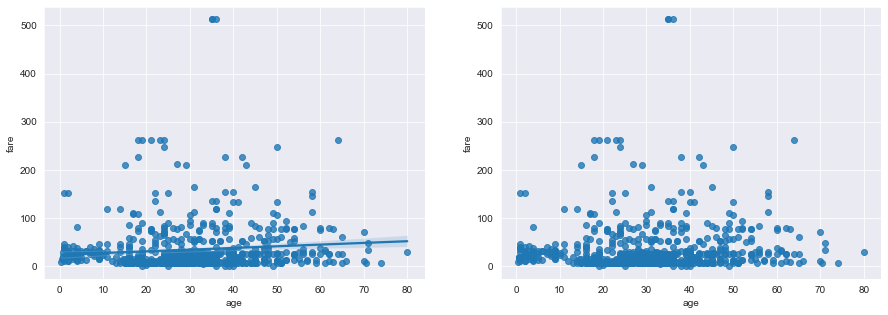

In [22]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형 회귀선이 포함된 그래프 그리기
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax1
)

# 선형 회귀선이 미포함된 그래프 그리기
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax2,
    fit_reg= False,
)

plt.show()


---
### 히스토그램 / 커널밀도 그래프
: 커널밀도 함수는 그래프와 X축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수

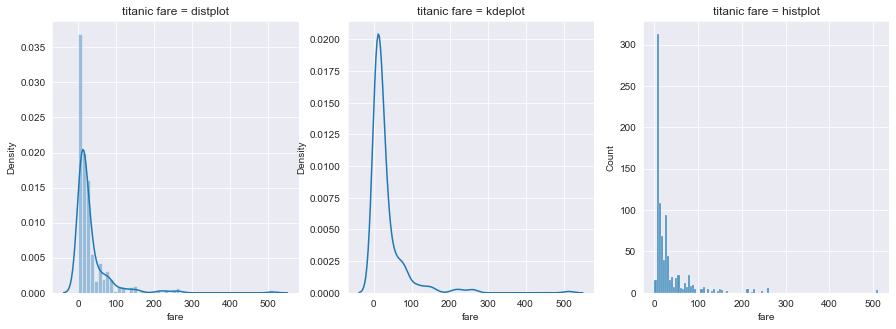

In [33]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 히스토그램 / 커널 밀도
sns.distplot(titanic['fare'], ax = ax1)

# 커널 밀도
sns.kdeplot(titanic['fare'], ax = ax2) 
#(titanic['fare'] / titanic['fare'].sum()).max() == 0.017854955922710854
# 커널 밀도가 최고 값이 0.02 가 넘는 것을 봐서 백분율을 그래프 수식화 한거인 듯


# 히스토그램
sns.histplot(x= 'fare',data = titanic, ax = ax3) # 이렇게 써도됨

# 차트 제목
ax1.set_title('titanic fare = distplot')
ax2.set_title('titanic fare = kdeplot')
ax3.set_title('titanic fare = histplot')

plt.show()

> fare(운임)가 대부분 100달러 미만에 집중 되어 있다.

---
### 히트맵
- 2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류
- 머신러닝에서 시본으로 많이 쓰나 딥러닝은 2차원이 넘어가서 그냥 matplotlib 을 자주 쓴다.

In [44]:
table = titanic.pivot_table(index= ['sex'], columns=['class'], aggfunc= 'size')# size는 갯수(count인 듯)
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [42]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


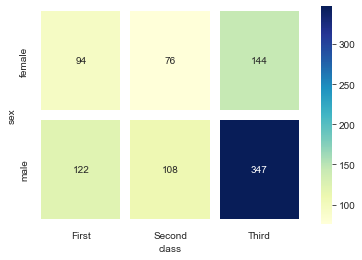

In [57]:
sns.heatmap(
    table,
    annot=True, # annotation
    fmt = 'd', # 지수쓰지말고 정수로 보여줘라 , '.2f' 로 쓰면  소숫점 2째까지 보임
    linewidths= 10, # 간격 
    cmap = 'YlGnBu', #colormap  옐로 그린 블루 , 외우기 어려우니 찾아보고 쓰는 게 좋음
    cbar = True, #colorBar, default는 True
)

plt.show() # 진할수록 적고, 밝을 수록 많다.

## 범주형 데이터의 산점도
- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인

In [58]:
sns.set_style('whitegrid')

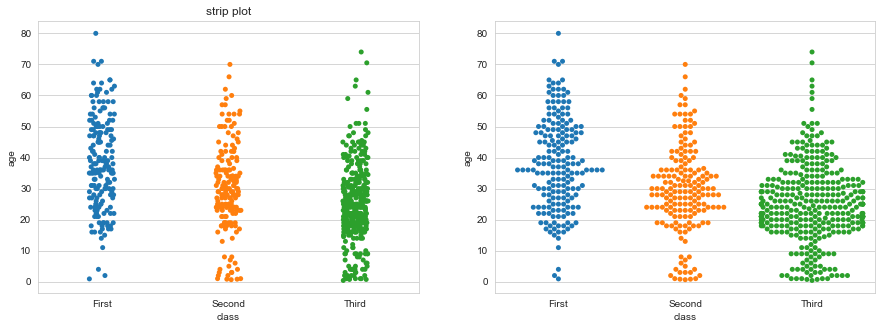

In [67]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#strip 은 스카치 테이프 짤라서 놓은 것 같은 걸 스트립이라함 
sns.stripplot( 
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax1,
)

#swarm 떼 를 의미하는듯 ex)벌레떼,세뗴
sns.swarmplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax = ax2,
)

# 차트 제목
ax1.set_title('strip plot')
plt.show()

---
### 막대 그래프

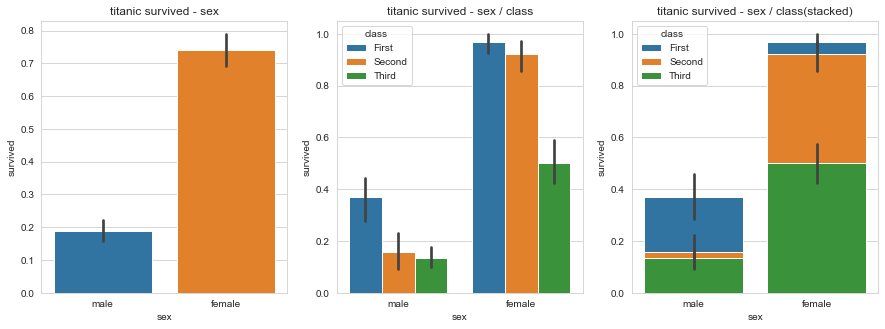

In [85]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x = 'sex',
    y = 'survived',
    data = titanic,
    ax = ax1,
    # 오차막대(error bar) - 95% 기준에서 오차의 범위를 그려줌 
    # ci 가 default 일 때  검은 선은 95% 신뢰구간에 대한 생존률일 때 범위 
    # ci = 'sd', # sd라고 쓰면 검은 선이 표준 편차의 범위를 줌
)

# x, y, hue (x,y 말고 hue를 써서 3차원으로 쓰고 싶을 댸)
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    data = titanic,
    ax = ax2
)

sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    dodge = False,
    data = titanic,
    ax = ax3
)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex / class')
ax3.set_title('titanic survived - sex / class(stacked)')

plt.show()

---
## 빈도 그래프

In [86]:
sns.set_style('whitegrid')

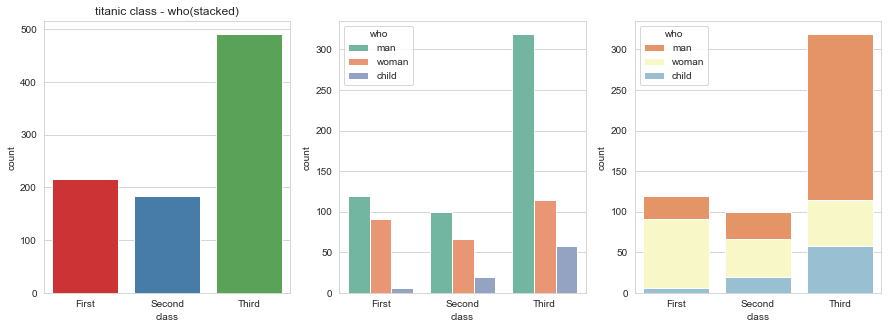

In [107]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot( # 우리가 아는 기본 막대 그래프
    x = 'class',
    data = titanic,
    palette = "Set1",
    ax = ax1,
)

# hue
sns.countplot( # 우리가 아는 기본 막대 그래프
    x = 'class',
    data = titanic,
    hue='who',
    palette = "Set2",
    ax = ax2,
)

# stack
sns.countplot( # 우리가 아는 기본 막대 그래프
    x = 'class',
    data = titanic,
    hue='who',
    palette = "RdYlBu",#viridis
    dodge=False,
    ax = ax3 
)

ax1.set_title('titanic class')
ax1.set_title('titanic class - who')
ax1.set_title('titanic class - who(stacked)')


plt.show()

In [95]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
# 박스플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다.
- 바이올린 그래프 : 박스플롯에 커널 밀도 함수 그래프가 추가

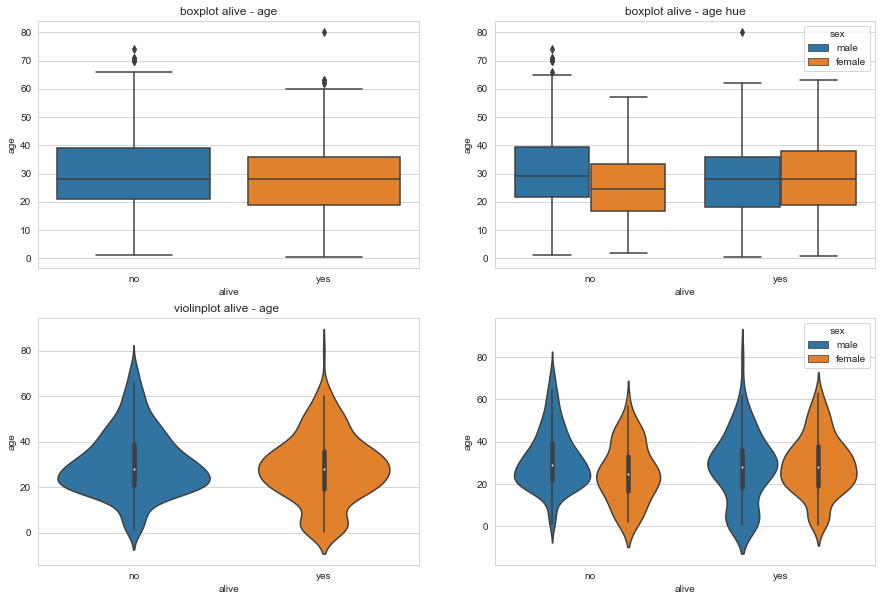

In [118]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# boxplot : 기본값 
sns.boxplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax = ax1,
)

# boxplot : 기본값  - hue:sex
sns.boxplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax = ax2,
)

# violinplot : 기본값
sns.violinplot(
    x = 'alive',
    y = 'age',

    data = titanic,
    ax = ax3,
)

# violinplot : 기본값 hue:sex
sns.violinplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax = ax4,
)

ax1.set_title('boxplot alive - age')
ax2.set_title('boxplot alive - age hue')
ax3.set_title('violinplot alive - age ')
ax4.set_title('violinplot alive - age hue')

plt.show()

In [109]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공

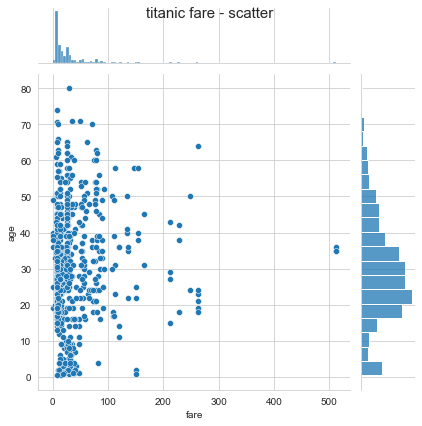

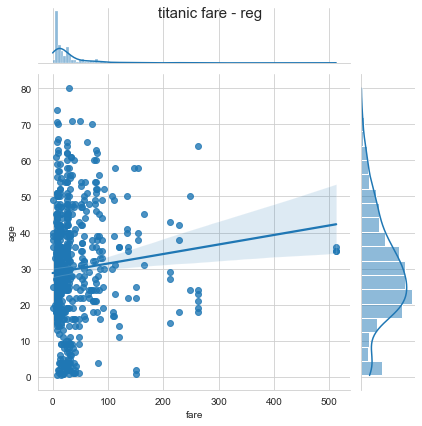

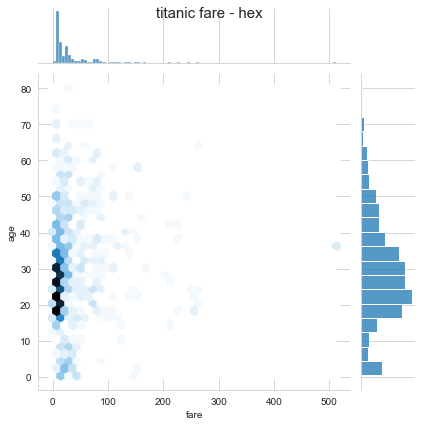

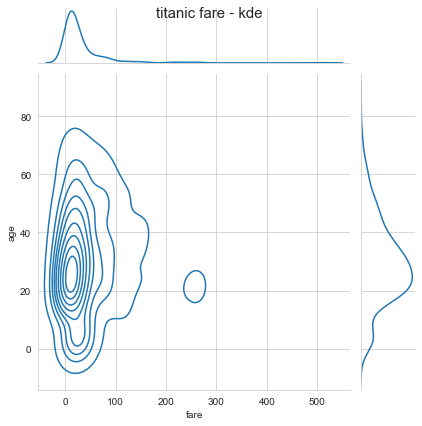

In [125]:
# 조인트 그래프 : 산점도 (기본값)
j1 = sns.jointplot(
    x = 'fare',
    y = 'age',
    data = titanic,
)

# 조인트 그래프 : 회귀선
j2 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'reg',
    data = titanic,
)

# 조인트 그래프 : 회귀선
j3 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'hex',
    data = titanic,
)

# 조인트 그래프 : 회귀선
j4 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind = 'kde',
    data = titanic,
)

j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)

plt.show()

---
### 조건을 적용하여 화면을 그리드로 분할하기

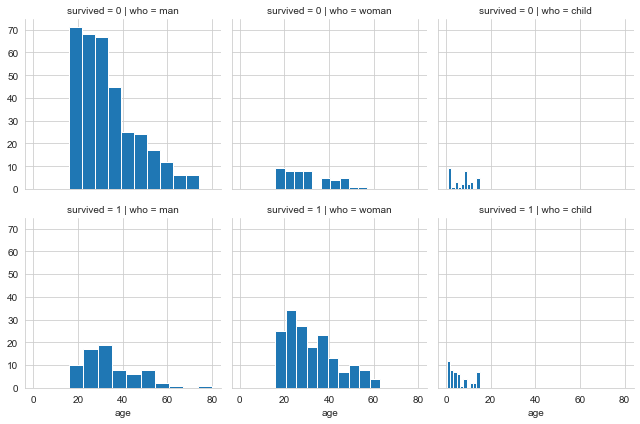

In [131]:
# 조건에 따라 Grid 나누기
g = sns.FacetGrid(
    data = titanic,
    col = 'who',
    row = 'survived',
)

g = g.map(plt.hist, 'age')


---
### 이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현

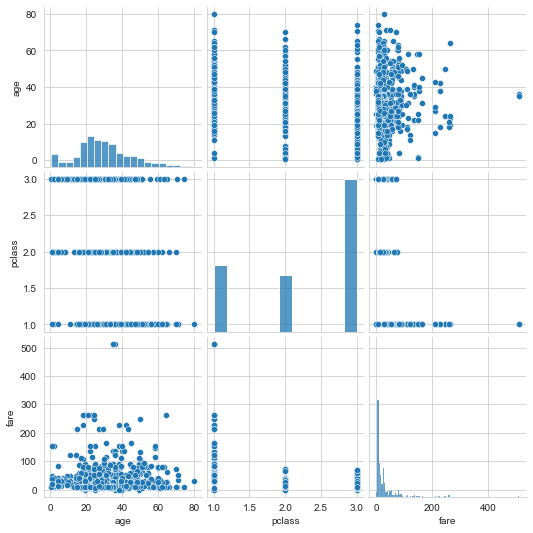

In [134]:
# titanic 데이터 셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리드 나누기
sns.pairplot(titanic_pair)

plt.show()